<a href="https://colab.research.google.com/github/DiantoroKadarman/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb.
 Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

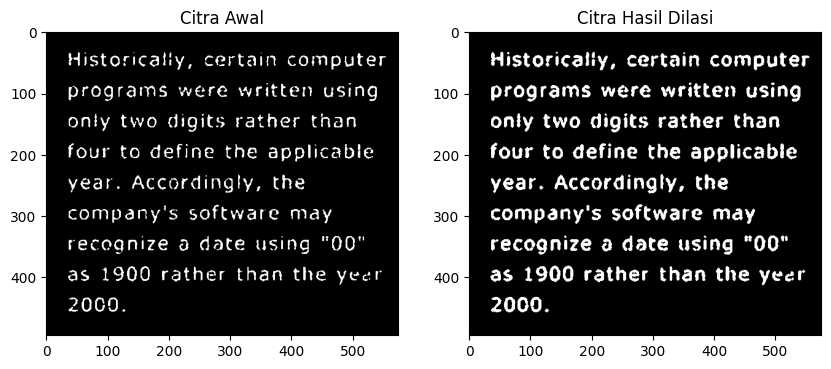

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan dilasi manual dengan SED cross 3x3
def dilasi_manual(image):
    # Structuring Element Dilasi (cross 3x3)
    SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    # Padding citra untuk menghindari error di tepi
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    # Membuat citra hasil dilasi yang kosong
    result_image = np.zeros_like(image)

    # Ukuran SED
    rows, cols = image.shape

    # Melakukan dilasi
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            # Memeriksa neighborhood sesuai dengan SED
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            # Jika ada elemen 1 pada neighborhood yang sesuai dengan SED, set piksel menjadi 1
            if np.any(neighborhood[SED == 1]):
                result_image[i-1, j-1] = 255

    return result_image

# Membaca citra yang diunggah
image_path = '/content/drive/MyDrive/PCVK/morphology.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Melakukan dilasi manual
dilated_image = dilasi_manual(binary_image)

# Menampilkan citra awal dan hasil dilasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (SED):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


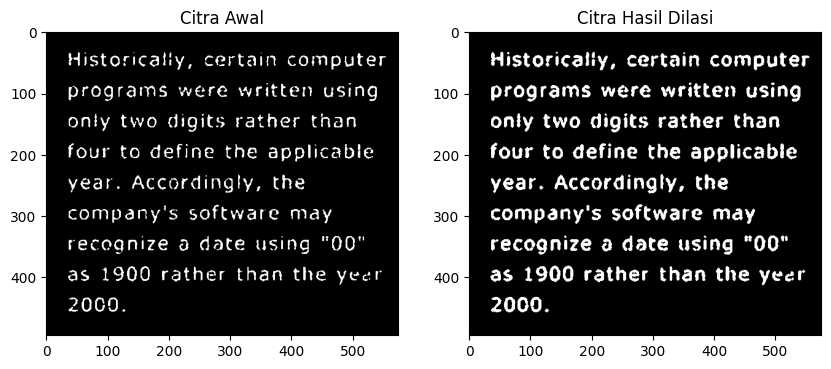

In [7]:
# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK/morphology.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk cross 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print("Structuring Element (SED):\n", kernel)

# Melakukan dilasi menggunakan structuring element
dilated_image = cv2.dilate(binary_image, kernel)

# Menampilkan citra awal dan hasil dilasi
plt.figure(figsize=(10, 5))

# Citra Awal
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

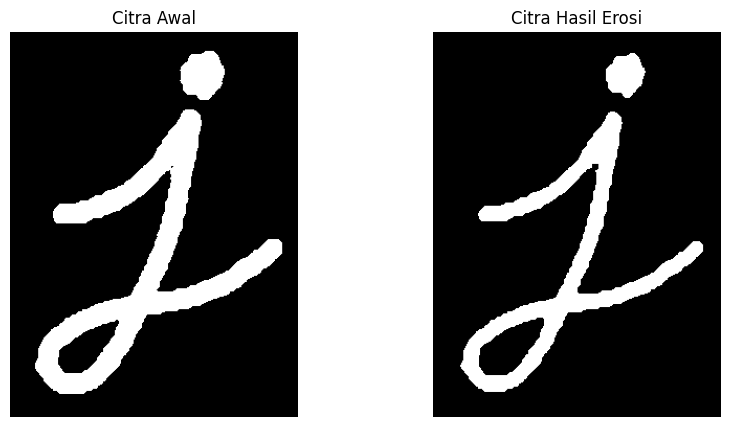

In [8]:
# Fungsi untuk melakukan erosi manual dengan SE square 5x5
def erosi_manual(image):
    # Structuring Element (SE) berbentuk square 5x5
    SE = np.ones((5, 5), dtype=np.uint8)

    # Padding citra untuk menghindari error di tepi
    padded_image = np.pad(image, ((2, 2), (2, 2)), mode='constant', constant_values=0)

    # Membuat citra hasil erosi yang kosong
    result_image = np.zeros_like(image)

    # Ukuran citra
    rows, cols = image.shape

    # Melakukan erosi
    for i in range(2, rows+2):
        for j in range(2, cols+2):
            # Memeriksa neighborhood sesuai dengan SE
            neighborhood = padded_image[i-2:i+3, j-2:j+3]
            # Jika semua elemen neighborhood sesuai dengan SE (hanya piksel putih/255), set piksel menjadi 255
            if np.all(neighborhood[SE == 1] == 255):
                result_image[i-2, j-2] = 255

    return result_image

# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK/j.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Melakukan erosi manual
eroded_image = erosi_manual(binary_image)

# Menampilkan citra awal dan hasil erosi
plt.figure(figsize=(10, 5))

# Citra Awal
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Citra Hasil Erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

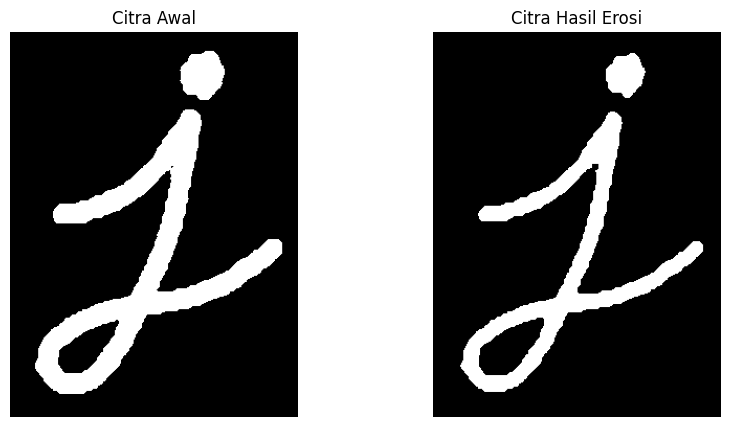

In [9]:
# Fungsi untuk melakukan erosi manual dengan SE square 5x5
def erosi_manual(image):
    # Structuring Element (SE) berbentuk square 5x5
    SE = np.ones((5, 5), dtype=np.uint8)

    # Padding citra untuk menghindari error di tepi
    padded_image = np.pad(image, ((2, 2), (2, 2)), mode='constant', constant_values=0)

    # Membuat citra hasil erosi yang kosong
    result_image = np.zeros_like(image)

    # Ukuran citra
    rows, cols = image.shape

    # Melakukan erosi
    for i in range(2, rows+2):
        for j in range(2, cols+2):
            # Memeriksa neighborhood sesuai dengan SE
            neighborhood = padded_image[i-2:i+3, j-2:j+3]
            # Jika semua elemen neighborhood sesuai dengan SE (hanya piksel putih/255), set piksel menjadi 255
            if np.all(neighborhood[SE == 1] == 255):
                result_image[i-2, j-2] = 255

    return result_image

# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK/j.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Melakukan erosi manual
eroded_image = erosi_manual(binary_image)

# Menampilkan citra awal dan hasil erosi
plt.figure(figsize=(10, 5))

# Citra Awal
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Citra Hasil Erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

### Tanpa Library

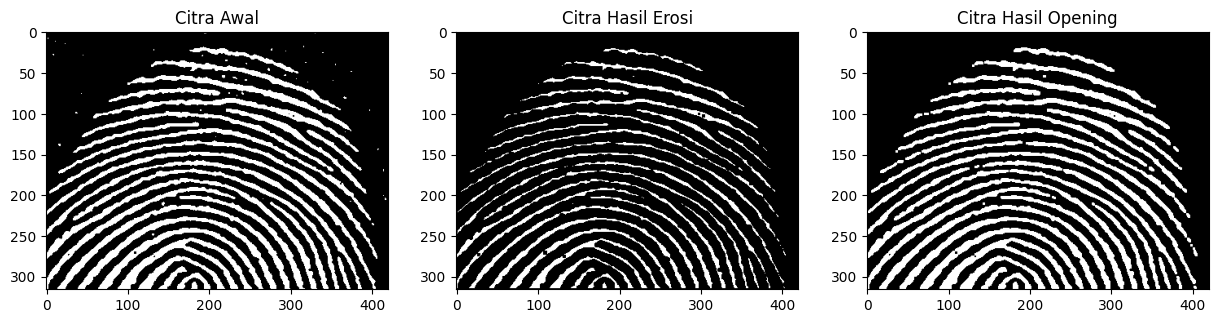

In [12]:
# Fungsi untuk erosi manual
def erosi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.min(region * SE)
    return output

# Fungsi untuk dilasi manual
def dilasi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.max(region * SE)
    return output

# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
SE = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

# Melakukan operasi opening: erosi lalu dilasi
eroded_image = erosi_manual(binary_image, SE)
opened_image = dilasi_manual(eroded_image, SE)

# Menampilkan citra awal, hasil erosi, dan hasil opening
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')


# Citra Hasil Erosi
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')


# Citra Hasil Opening
plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')


plt.show()

### Dengan Library

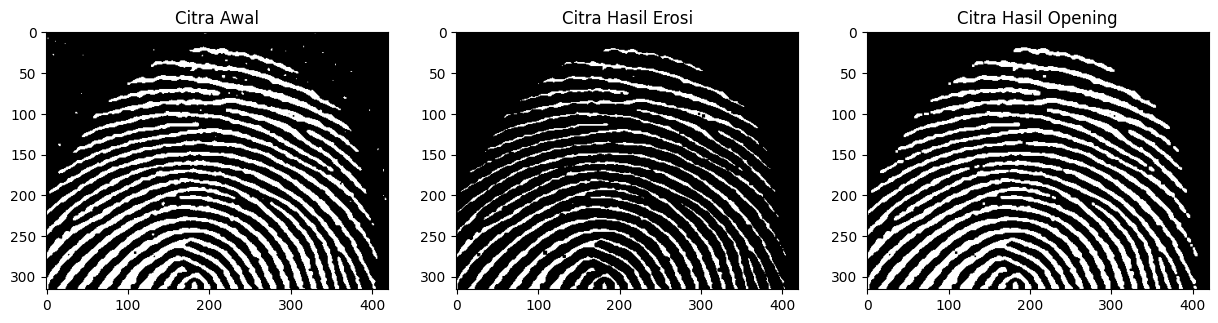

In [13]:
# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi opening menggunakan OpenCV
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Menampilkan citra awal dan hasil opening
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Erosi (menggunakan OpenCV)
eroded_image = cv2.erode(binary_image, kernel)
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

# Citra Hasil Opening
plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

### Tanpa Library

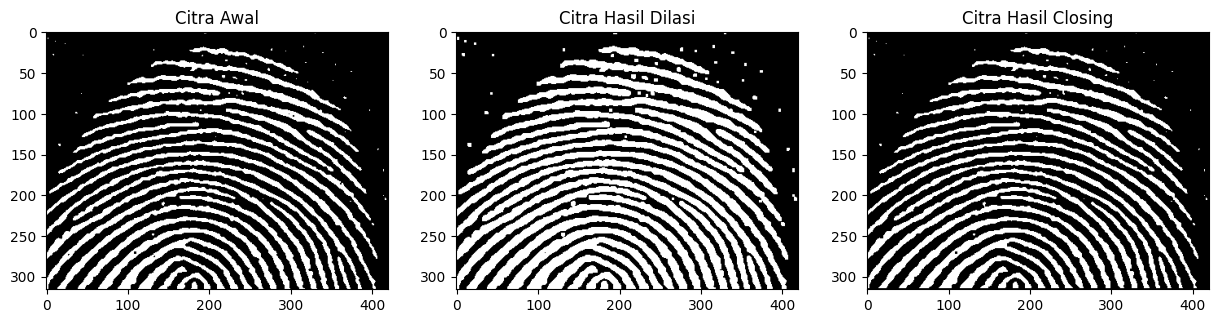

In [14]:
# Fungsi untuk dilasi manual
def dilasi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.max(region * SE)
    return output

# Fungsi untuk erosi manual
def erosi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.min(region * SE)
    return output

# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
SE = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

# Melakukan operasi closing: dilasi lalu erosi
dilated_image = dilasi_manual(binary_image, SE)
closed_image = erosi_manual(dilated_image, SE)

# Menampilkan citra awal, hasil dilasi, dan hasil closing
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Dilasi
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

# Citra Hasil Closing
plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

### Dengan Library

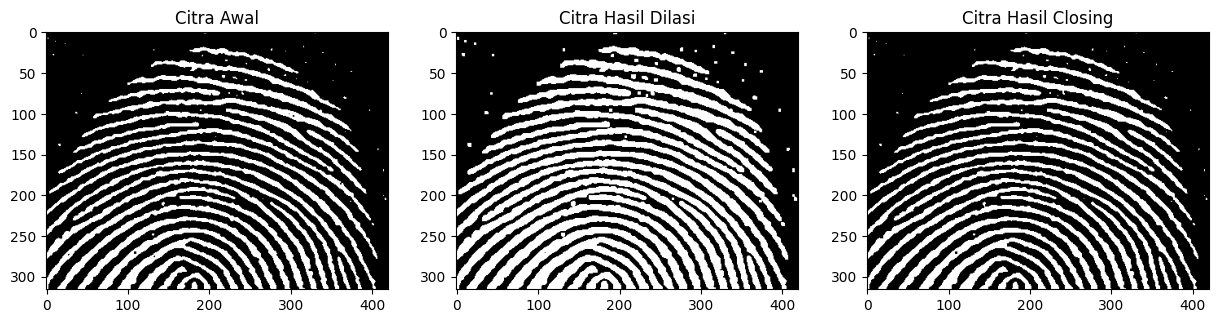

In [15]:
# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi closing menggunakan OpenCV
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Menampilkan citra awal dan hasil closing
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Dilasi (menggunakan OpenCV)
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

# Citra Hasil Closing
plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

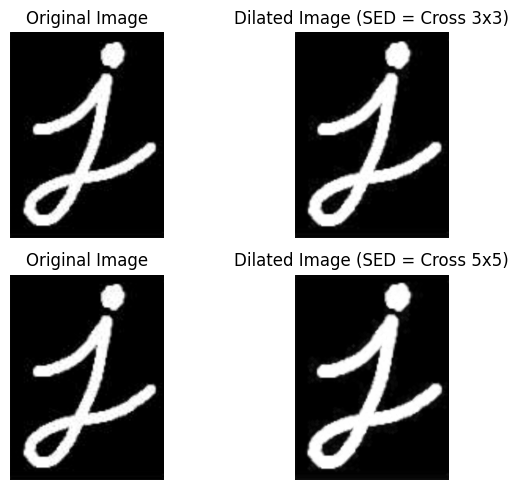

In [3]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create a Structuring Element in the shape of a 3x3 Cross
def create_cross_SE_3x3():
    SE = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
    return SE

# Create a Structuring Element in the shape of a 5x5 Cross
def create_cross_SE_5x5():
    SE = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [1, 1, 1, 1, 1],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)
    return SE

# Function for dilation using OpenCV
def dilate_with_opencv(image, SE):
    dilated_img = cv2.dilate(image, SE)
    return dilated_img

# Create structuring elements
SE_3x3 = create_cross_SE_3x3()
SE_5x5 = create_cross_SE_5x5()

# Perform dilation operations with the structuring elements
dilated_img_3x3 = dilate_with_opencv(img, SE_3x3)
dilated_img_5x5 = dilate_with_opencv(img, SE_5x5)

# Increase the figure size for better visualization
plt.figure(figsize=(7, 5))  # Adjusting the display size (width, height)

# Row 1: Original Image and SED = Cross 3x3
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Dilated Image (SED = Cross 3x3)")
plt.imshow(dilated_img_3x3, cmap='gray')
plt.axis('off')

# Row 2: Original Image and SED = Cross 5x5
plt.subplot(2, 2, 3)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Dilated Image (SED = Cross 5x5)")
plt.imshow(dilated_img_5x5, cmap='gray')
plt.axis('off')

# Display all images
plt.tight_layout()
plt.show()


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

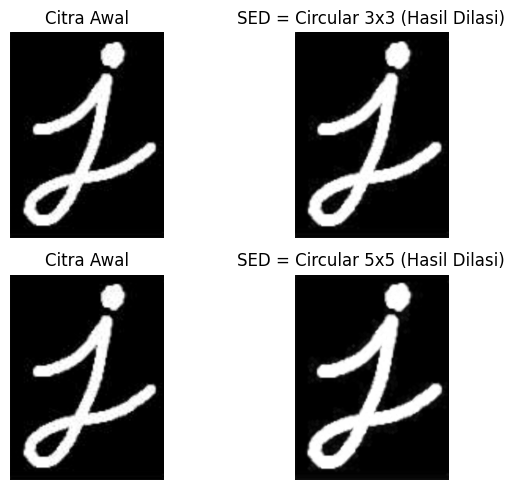

In [16]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Circular 3x3
def create_circular_SE_3x3():
    radius = 1  # Jari-jari untuk 3x3
    SE = np.zeros((3, 3), dtype=np.uint8)
    for i in range(3):
        for j in range(3):
            if (i - 1) ** 2 + (j - 1) ** 2 <= radius ** 2:
                SE[i, j] = 1
    return SE

# Membuat Structuring Element berbentuk Circular 5x5
def create_circular_SE_5x5():
    radius = 2  # Jari-jari untuk 5x5
    SE = np.zeros((5, 5), dtype=np.uint8)
    for i in range(5):
        for j in range(5):
            if (i - 2) ** 2 + (j - 2) ** 2 <= radius ** 2:
                SE[i, j] = 1
    return SE

# Fungsi dilasi menggunakan OpenCV
def dilate_with_opencv(image, SE):
    dilated_img = cv2.dilate(image, SE)
    return dilated_img

# Membuat structuring elements
SE_circular_3x3 = create_circular_SE_3x3()
SE_circular_5x5 = create_circular_SE_5x5()

# Melakukan operasi dilasi dengan structuring elements
dilated_img_circular_3x3 = dilate_with_opencv(img, SE_circular_3x3)
dilated_img_circular_5x5 = dilate_with_opencv(img, SE_circular_5x5)

# Memperbesar ukuran tampilan
plt.figure(figsize=(7, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Baris 1: Citra Awal dan SED = Circular 3x3
plt.subplot(2, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("SED = Circular 3x3 (Hasil Dilasi)")
plt.imshow(dilated_img_circular_3x3, cmap='gray')
plt.axis('off')

# Baris 2: Citra Awal dan SED = Circular 5x5
plt.subplot(2, 2, 3)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("SED = Circular 5x5 (Hasil Dilasi)")
plt.imshow(dilated_img_circular_5x5, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.tight_layout()
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

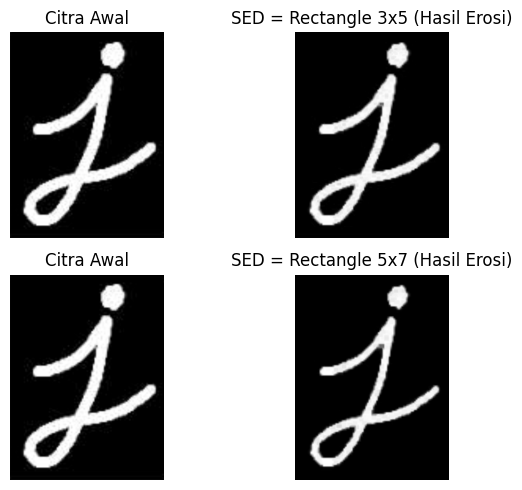

In [17]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Rectangle 3x5
def create_rectangle_SE_3x5():
    SE = np.ones((3, 5), dtype=np.uint8)  # Elemen struktural rectangle 3x5
    return SE

# Membuat Structuring Element berbentuk Rectangle 5x7
def create_rectangle_SE_5x7():
    SE = np.ones((5, 7), dtype=np.uint8)  # Elemen struktural rectangle 5x7
    return SE

# Fungsi erosi menggunakan OpenCV
def erode_with_opencv(image, SE):
    eroded_img = cv2.erode(image, SE)
    return eroded_img

# Membuat structuring elements
SE_rectangle_3x5 = create_rectangle_SE_3x5()
SE_rectangle_5x7 = create_rectangle_SE_5x7()

# Melakukan operasi erosi dengan structuring elements
eroded_img_rectangle_3x5 = erode_with_opencv(img, SE_rectangle_3x5)
eroded_img_rectangle_5x7 = erode_with_opencv(img, SE_rectangle_5x7)

# Memperbesar ukuran tampilan
plt.figure(figsize=(7, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Baris 1: Citra Awal dan SED = Rectangle 3x5
plt.subplot(2, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("SED = Rectangle 3x5 (Hasil Erosi)")
plt.imshow(eroded_img_rectangle_3x5, cmap='gray')
plt.axis('off')

# Baris 2: Citra Awal dan SED = Rectangle 5x7
plt.subplot(2, 2, 3)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("SED = Rectangle 5x7 (Hasil Erosi)")
plt.imshow(eroded_img_rectangle_5x7, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.tight_layout()
plt.show()


12.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

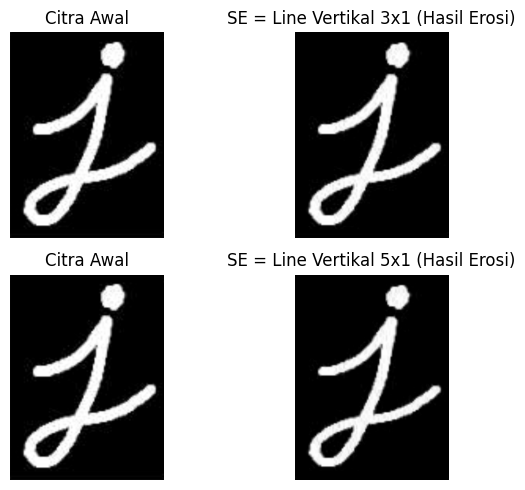

In [19]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
image  = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat structuring element (elemen struktur) berbentuk garis vertikal
kernel_3 = np.ones((3, 1), np.uint8)  # Elemen struktur 3x1
kernel_5 = np.ones((5, 1), np.uint8)  # Elemen struktur 5x1

# Menerapkan operasi erosi
erosion_3 = cv2.erode(image, kernel_3)
erosion_5 = cv2.erode(image, kernel_5)

# Menampilkan gambar asli dan hasil erosi
plt.figure(figsize=(7, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Baris 1: Gambar Asli dan Erosi dengan Kernel 3x1
plt.subplot(2, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('SE = Line Vertikal 3x1 (Hasil Erosi)')
plt.imshow(erosion_3, cmap='gray')
plt.axis('off')

# Baris 2: Gambar Asli dan Erosi dengan Kernel 5x1
plt.subplot(2, 2, 3)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('SE = Line Vertikal 5x1 (Hasil Erosi)')
plt.imshow(erosion_5, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
